 #                                    Project 2018 - Box Plots

 ## 1. History and uses of box plots

John Tukey introduced the box and whiskers plot as part of his toolkit for exploratory data analysis. Over 40 years later, the boxplot has become one of the most frequently used tools for data visualisation
and is one of the few plot types invented in the 20th century that has found widespread adoption.

The box plot was originally designed to be computated and drawn by hand. The basic graphic form of the boxplot, the range-bar, was established in the early 1950’s by M. E. Spear in the book Charting Statistics.[1]

A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). It can tell you about your outliers and what their values are. It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.[2] Essentilly, it is a good way to see how your data is spread out. 


In [1]:
%matplotlib inline
# import pandas library; pandas is a library used for data analysis and creating data structures in Python
import pandas as pa
# import numpy library; numpy is a statistical library used for data analysis using Python
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

## 2. Box plots - Foreign Currency tracking

In [2]:
dateCol = ['Date']
fx = pa.read_csv("https://raw.githubusercontent.com/donalcarr85/Datasets/master/eurofxref-hist.csv",
                 parse_dates=dateCol)

fx

,Date,AUD
0,2018-01-01,1.5565
1,2018-01-01,1.5525
2,2018-01-01,1.5595
3,2018-01-01,1.5631
4,2018-01-01,1.5664
5,2018-01-01,1.5708
6,2018-01-01,1.5721
7,2018-01-01,1.5725
8,2018-01-01,1.5712
9,2018-01-01,1.5660


In [3]:
fx["YearDate"]= pa.to_datetime(fx["Date"]) 

In [4]:
fx['Year'] = pa.DatetimeIndex(fx['Date']).year

<IPython.core.display.Javascript object>


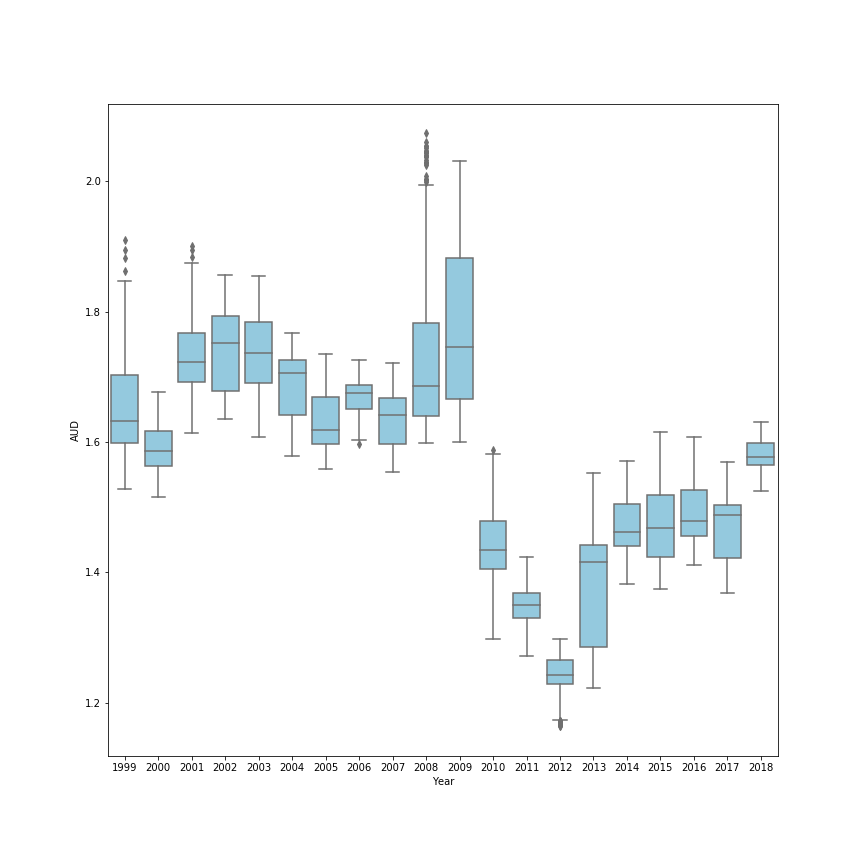

In [11]:
%matplotlib notebook
ax = sns.boxplot(x="Year", y="AUD", data=fx,color="skyblue")
plt.rcParams['figure.figsize']=(12,12)

In [33]:
print (fx.groupby('Year').describe())

        AUD                                                                 
      count      mean       std     min       25%      50%       75%     max
Year                                                                        
1999  259.0  1.652342  0.079822  1.5274  1.598800  1.63240  1.702350  1.9100
2000  255.0  1.588947  0.035807  1.5155  1.563600  1.58620  1.617150  1.6770
2001  254.0  1.731871  0.059756  1.6137  1.692225  1.72260  1.767500  1.9000
2002  255.0  1.737645  0.063116  1.6360  1.678400  1.75260  1.793100  1.8556
2003  255.0  1.737941  0.061568  1.6079  1.691050  1.73730  1.784100  1.8554
2004  259.0  1.690489  0.048715  1.5781  1.641650  1.70550  1.725650  1.7673
2005  257.0  1.631962  0.043731  1.5593  1.596900  1.61840  1.669500  1.7354
2006  255.0  1.666811  0.032128  1.5974  1.651300  1.67530  1.687100  1.7260
2007  255.0  1.634836  0.038079  1.5536  1.596950  1.64130  1.667500  1.7213
2008  256.0  1.741623  0.136972  1.5984  1.640375  1.68645  1.782625  2.0735

## Box Plot Terminology

Here I will explain the various elements of a box plot referencing plot and summary statistics above:
    1. Median: is the middle point of the data set (50th percentile) i,e, the horizontal line within the box
        Example - 1999 the median is 1.63
    2. First Quartile: the middle number between the smallest number (not the "minimum") and the median of the dataset.
        Example - 2018: 1.56
    3. Third Quartile: the middle value between the median and the highest value (not the "maximum") of the dataset.
        Example - 2018: 1.59
    4. Interquartile Range: the area between the 25th and 75th percentile i.e. rectangle 
    5. Whiskers - line connecting the quartiles to the minumum or maximum values
    6. Outliers - is any value that lies more than one and a half times the length of the box from either end of the box.
    

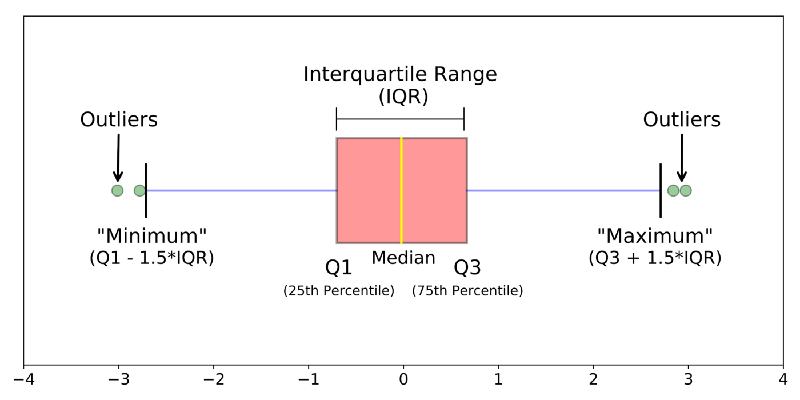

In [12]:
from IPython.display import Image
Image(filename="BP.jpg")

## Alternatives to Box Plots